In [75]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares,UnbinnedNLL

In [76]:
def f(x):
    return 2*np.sin(.5*x + .78) + .8

In [77]:
x = [.5,2.5,4.5,6.5,8.5,10.5]

In [78]:
def gen_data(x,sigma):
    return [f(i) + np.random.normal(0,sigma) for i in x]

In [79]:
y = [f(i) for i in x]

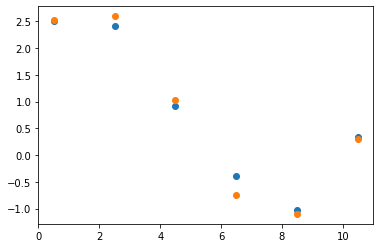

In [80]:
data = gen_data(x,0.3)
plt.scatter(x,data)
plt.scatter(x,y)
plt.show()

In [81]:
def func(x,p_o,p_1,p_2,p_3):
    return p_o*np.sin(p_1*x+p_2) + p_3

In [82]:
def fit(yerror,func):
    cost = LeastSquares(x,data,yerror,func)
    my_minuit = Minuit(cost, p_o=0,p_1=.5,p_2=0,p_3=0)
    my_minuit.migrad()
    my_minuit.hesse()
    display(my_minuit)
    return my_minuit

In [83]:
fitted = fit(0.3, func)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted.fval ,fitted.ndof))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6015 (χ²/ndof = 0.3)     │              Nfcn = 138              │
│ EDM = 2.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_o  │   1.80    │   0.17    │            │            │         │         │       │
│ 1 │ p_1  │   0.481   │   0.035   │            │            │         │         │       │
│ 2 │ p_2  │   0.91    │   0.25    │            │            │         │         │       │
│ 3 │ p_3  │   0.86    │   0.14    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────┐
│     │     p_o     p_1     p_2     p_3 │
├─────┼─────────────────────────────────┤
│ p_o │  0.0297  0.0013  -0.007  -0.001 │
│ p_1 │  0.0013 0.00125 -0.0082 -0.0022 │
│ p_2 │  -0.007 -0.0082  0.0636   0.016 │
│ p_3 │  -0.001 -0.0022   0.016  0.0191 │
└─────┴─────────────────────────────────┘

Q squared: 0.601544 
Degrees of freedom: 2


In [84]:
def gen_data2(x,sigma1,sigma2):
    return [(2*np.random.normal(0,sigma1))*np.sin((0.5*np.random.normal(0,sigma1))*i+(0.78*np.random.normal(0,sigma1))) + (0.8*np.random.normal(0,sigma1)) + np.random.normal(0,sigma2) for i in x]

<ErrorbarContainer object of 3 artists>

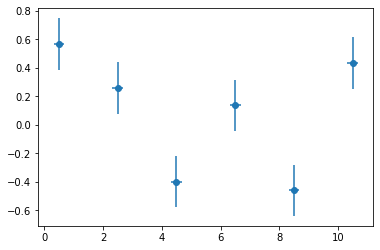

In [85]:
sigma1, sigma2 = 0.3, 0.3

data2 = gen_data2(x,sigma1,sigma2)
plt.scatter(x,data2)
errors = (sigma1**2 + sigma2**2)* np.ones(len(data2))
plt.errorbar(x,data2,errors,errors, linestyle= 'None')

In [86]:
fitted2 = fit(errors[0], func)
print("Q squared: %f \nDegrees of freedom: %d" % (fitted2.fval ,fitted2.ndof))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.671 (χ²/ndof = 0.8)      │              Nfcn = 138              │
│ EDM = 6.9e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p_o  │    1.8    │    0.1    │            │            │         │         │       │
│ 1 │ p_1  │   0.481   │   0.021   │            │            │         │         │       │
│ 2 │ p_2  │   0.91    │   0.15    │            │            │         │         │       │
│ 3 │ p_3  │   0.86    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────┐
│     │     p_o     p_1     p_2     p_3 │
├─────┼─────────────────────────────────┤
│ p_o │  0.0107  0.5e-3  -0.003  -0.000 │
│ p_1 │  0.5e-3 0.00045 -2.9e-3 -0.8e-3 │
│ p_2 │  -0.003 -2.9e-3  0.0229   0.006 │
│ p_3 │  -0.000 -0.8e-3   0.006 0.00686 │
└─────┴─────────────────────────────────┘

Q squared: 1.670966 
Degrees of freedom: 2
